# 경영과데이터베이스 13조   (김진용, 이충현, 나미영, 김엘레나)
## 제목: 서울시 아파트 매매가 원인 분석 

# ※ 목차 

## 1. 주제 선정 이유 & 배경
 - 서울시 지도 
 - 부동산 매매가 시계열 분석

## 2. 서울시 아파트 가격에 영향을 끼치는 원인 분석
1. 학원수
2. 한강인접여부 
3. 아파트 건설 현황
4. 재정자립도
5. 이혼율
6. 결혼율

## 3. 다중회귀분석(OLS)을 통한 해설 

## 4. 한계점 

## 5. 결론 및 시사점 

## 6. 요약

In [1]:
# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
# 여러가지 패키지 불러오기
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [3]:
# 서울 지도 형태 가져오기
import json 
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) # 불필요한 오류를 무시하기 위한 코드

geo_path = 'skorea_municipalities_geo_simple.json' # json파일 형태의 지도 불러오기
geo_str = json.load(open(geo_path, encoding='utf-8')) 

# 1. 주제 선정 이유 & 배경

주택은 우리나라 일반 국민들의 자산 중에 큰 비중을 차지하는 자산이며, 주택 가격의 변동은 투자자, 정책당국 등 많은 경제 주체들의 관심이 되어 왔다. 우리나라의 주택유형은 단독주택에서 아파트로 빠르게 변화하였다. 2010년을 기준으로 전국 단독주택의 비율은 27%이고, 아파트의 비율은 58%를 차지하고 있다. 이렇듯 주택유형은 아파트의 비중이 높아지고 있다. 주택매매가격을 주도하는 것도 아파트가격이다. 주택시장이 변화하면서 주택가격결정요인에 관한 연구도 아파트 중심으로 이루어지고 있다. 아파트는 소비재로서의 성격과 아울러 투자대상으로서의 성격이 혼재되어 있다. 가계의 자산운용 포트폴리오에 있어 부동산투자는 여전히 매력적인 투자처로 인식되고 있으며 그 중에서 서울 및 수도권 아파트 투자는 자산포트폴리오에 있어 80% 이상을 차지하고 있다. 아파트 매매 가격은 기본적으로 기초 경제여건에 의해 영향을 받지만 기초 경제여건에 의해 설명이 되지 않는 가격 부분도 존재하는데 예를 들어, 투자자들의 심리적인 측면에 의해 가격이 영향을 받기도 한다. 과제의 목표는 서울 구내 공급된 아파트 가격을 분석하고 아파트 가격(y)에 대한 독립변수를 실생활에서 쉽게 접할 수 있는 정보들로 구성하여 이에 대한 상관관계를 분석하고자 한다. 그리고 최종적으로 분석 결과를 통해 소비자들이 아파트 거래를 할 때 대략적이고 간단하게 투자대상의 가치로서 파악할 수 있도록 돕는 지표로 제공하고자 한다.

In [4]:
# 서울시 구별 m2당 아파트 매매가겨 데이터 불러오기 >> 지도를 표시하기 위해 
price = pd.read_excel("중위단위매매가격_아파트.xlsx",header=10,encoding="euc-kr")

In [5]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)
map.choropleth(geo_data = geo_str,
               data = price["기타"],
               columns = [price.index,price["기타"]],
               fill_color = 'YlGnBu',fill_opacity=0.4, # 지도에서 서울시 영역을 구분하기 위해서
               key_on = 'feature.id')
map

# 분석 전의 서울지도 
우리는 위의 지도를 분석을 통해 소비자들의 아파트 거래 의사결정에 도움을 줄 수 있는 유의미한 지표로 만들고자 한다. 그리고 소비자들이 일상생활에서 쉽게 접할 수 있는 친근한 자료들을 통해 서울 구별 가격을 비교해보도록 한다.
학원수, 한강 인접 여부, 아파트 건설 현황, 재정자립도, 이혼율, 결혼율의 6개의 요인을 아파트 가격에 영향을 미친 변수로 선정했다. 모든 분석은 상관관계분석을 중심으로 위의 변수들이 아파트 가격에 얼마나 영향을 끼쳤는지 알아 볼 예정이다.

## 서울시 구별 m2당 아파트 매매가 상관분석
### - 아파트 매매가가 얼마나 비싼지 체감도를 높이기 위해 단위(m2: 미터제곱)당 매매가 가격을 사용함 

In [6]:
# 서울시 구별 m2당 아파트 매매가격 데이터 불러오기
price.head()

,지 역,구별,2015년 01월,2015년 02월,2015년 03월,2015년 04월,2015년 05월,2015년 06월,2015년 07월,2015년 08월,...,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,기타
0,NaN,서울시,5829,5846,5883,5940,5978,6031,6285,6314,...,6820,6809,6819,6845,7599,7740,7906,7946,7979,1
1,NaN,종로구,5841,5841,5847,5865,5906,5894,5908,5920,...,6458,6472,6489,6542,7756,7908,8013,8024,8024,1
2,NaN,중구,5818,5836,5871,5901,5901,5954,6019,6030,...,6312,6353,6371,6406,7964,8046,8064,8064,8064,1
3,NaN,용산구,7313,7317,7351,7386,7440,7449,7380,7380,...,8089,8089,8089,8123,10552,10841,11169,11253,11329,1
4,NaN,성동구,5600,5600,5655,5710,5680,5714,5832,5906,...,6438,6436,6445,6523,7847,8024,8246,8329,8295,1


In [7]:
# 2016년 아파트 매매가 데이터 쓸 경우 >> price_2016
price_2016 = price.loc[:,["구별","2016년 12월"]] # 구별, 2016년 가격 열의 데이터만 가져오기
price_2016.drop([0],inplace=True) ## 서울시 평균 데이터 삭제

In [8]:
price_2016.head()

,구별,2016년 12월
1,종로구,6165
2,중구,6163
3,용산구,7773
4,성동구,6178
5,광진구,7050


In [9]:
# 2017년 아파트 매매가 데이터 쓸 경우 >> price_2017
price_2017 = price.loc[:,["구별","2017년 12월"]] # 구별, 2017년 가격 열의 데이터만 가져오기
price_2017.drop([0],inplace=True) ## 서울시 평균 데이터 삭제

In [10]:
price_2017.head()

,구별,2017년 12월
1,종로구,7756
2,중구,7964
3,용산구,10552
4,성동구,7847
5,광진구,8671


## 시계열로 보는 서울시 아파트 매매가

## 부동산 시장 소비심리지수 

### 부동산 시장 소비심리지수 정의 및 설명
소비심리지수는 생활형편, 경기상황 등 소비자의 응답결과를 집계하여 작성하고 있는 17개 개별지수 중 소비자의 심리를 종합적으로 판단하는 데 유용한 중요지수(6개)를 선택, 이를 합성하여 작성한 종합지수이다.

부동산 시장에서 소비자는 거래량 변동과 부동산 가격 등에 영향을 미치는 중요한 요인으로, 시장에서의 거래는 부동산의 미래가치에 대한 소비자들의 기대감에 기반 한다. 현재 우리나라 부동산 시장은 소비자 중심의 시장으로 변화하면서, 소비자의 심리적 요인을 고려할 필요성이 증대됨에 따라, 국토연구원은 부동산심리지수를 매월 발표하고 있는 실정이다.

부동산 소비심리지수는 시장 참여자의 구매 동향과 구매 의사를 분석하기 위한 것으로, 전국 150개 조사대상 지역 중 거주 중인 일반 가구와 영업 중인 부동산 중개업소를 대상으로 설문조사를 실시하여 작성된다. 부동산심리지수를 통해 소비자의 행태 변화를 분석하여 부동산 시장에 대한 예측력을 높임으로써 정부 등 많은 경제 주체들의 의사결정 방향성을 제시한다는 점에서 의의를 가진다.

부동산심리지수는 0-200의 값으로 표현되며, 여기서 심리지수가 100 이상이면 소비자의 거래증가와 가격상승에 대한 응답이 많은 것을 뜻하며, 이는 소비자들이 전월에 비해 부동산 시장상황이 개선될 것이라는 기대를 가지는 것으로 해석할 수 있다.

In [11]:
# 부동산 시장 소비심리지수를 consumption 변수로 설정
consumption = pd.read_excel("부동산 시장 소비심리지수_.xlsx")

In [12]:
consumption.set_index(keys="지역", inplace=True) # 지역을 인덱스로 설정 

In [13]:
# 날짜 데이터의 표현 형식의 편집(예:2017년 12월 >> 2017.12)
col = [] 
for i in consumption.index:
    col.append(i.split()[0][:-1]+"."+i.split()[1][:-1])
col[:5]
consumption.index = col 

In [14]:
consumption.convert_objects(convert_numeric=True).head() # 데이터타입을 수치데이터로 변환

,전국,수도권,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남
2011.07,NaN,119.5,122.9,133.4,129.9,107.6,136.6,131.9,135.4,120.1,145.4,132.0,134.9,134.8,129.2,124.9,129.0
2011.08,129.9,124.8,128.3,136.7,135.6,114.0,141.3,131.7,138.3,125.2,146.1,135.1,135.5,135.6,136.6,130.3,133.6
2011.09,125.7,120.9,121.7,131.7,132.2,113.7,131.4,124.2,137.3,121.9,140.5,132.1,134.1,128.4,134.4,129.8,127.1
2011.10,116.4,108.9,109.2,123.6,127.4,106.9,130.0,115.7,131.8,109.2,129.6,126.4,130.4,126.1,127.3,127.6,118.3
2011.11,108.3,100.0,100.4,116.2,121.4,96.8,122.4,100.5,121.2,100.5,123.4,119.0,126.4,118.4,123.5,126.4,110.4


In [15]:
consumption = consumption.loc[:,["서울"]] # 서울 데이터만 가져오기

In [16]:
# 100을 기준선으로 설정하기 위해 기존 데이터프레임에 기준선 열 데이터를 추가
baseline =[]
for i in range(len(consumption)):
    baseline.append(int(100))

consumption['기준선'] = baseline

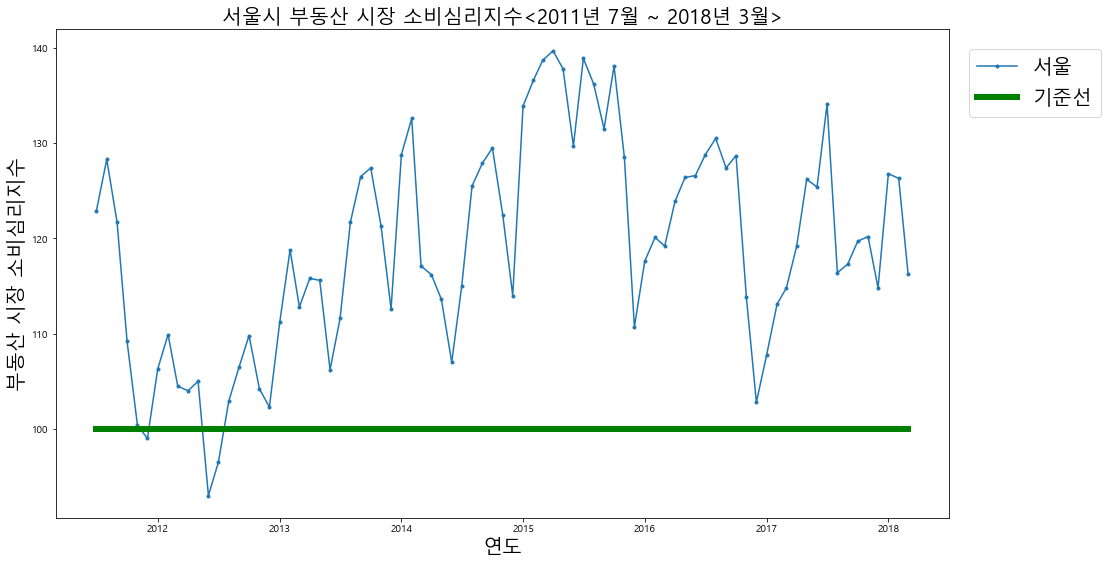

In [17]:
# 2011년 7월 ~ 2018년 3월 서울시 부동산 시장 소비심리지수 추이

xs0 = consumption.index # X축: 연도를 나타냄
xs0 = pd.to_datetime(xs0)# X축을 날짜 데이터로 변환하여 연도별로 표시 가능하게 함

plt.figure(figsize=(16,9))
plt.plot(xs0, consumption.loc[:,"서울"], marker= '.', label="서울")
plt.plot(xs0, consumption.loc[:,"기준선"],lw=6,c='g', label="기준선")

plt.legend(bbox_to_anchor=(1, 1), loc=0,borderaxespad=1,fontsize=20) # 범례 그리기 및 위치 설정
plt.ylabel('부동산 시장 소비심리지수',size=20) 
plt.xlabel('연도',size=20)
plt.title('서울시 부동산 시장 소비심리지수<2011년 7월 ~ 2018년 3월>',size=20)
plt.show()

#### 다소 변동이 심해보이나 대부분 2012년도를 제외하고 모두 100이상이기 때문에 부동산 시장 경제에 대한 소비자의 인식이 낙관적임을 알 수 있다.

## 서울시 구별 월간매매가격지수 ~ 주택담보대출금리 (최근 10년 시계열 분석)

### - 서울시 구별 월간 아파트 매매가격 지수 최근 10년(2008~2018)

In [18]:
# 서울시 구별 매매가격지수를 data1 변수 설정
data1 = pd.read_excel("서울시, 구별 월간 매매가격지수.xlsx")

In [19]:
# '지역' 열로 인덱스 설정
data1.set_index(keys="지역", inplace=True)

In [20]:
# 날짜 데이터의 편집(예:2017년 12월 >> 2017.12)
col = []
for i in data1.columns:
    col.append(i.split()[0][:-1]+"."+i.split()[1][:-1])
col[:5]
data1.columns = col

In [21]:
# 2008 ~ 2018년 최근 10년 데이터만 편집
data1 = data1.loc[:,"2008.01":"2018.03"]

In [22]:
data1.convert_objects(convert_numeric=True).head() #데이터타입을 수치데이터로 변환

,2008.01,2008.02,2008.03,2008.04,2008.05,2008.06,2008.07,2008.08,2008.09,2008.10,...,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03
지역,,,,,,,,,,,,,,,,,,,,,
서울,87.5,88.1,89.7,91.9,93.3,94.7,95.4,95.6,95.8,95.5,...,98.2,98.7,99.3,99.3,99.6,100,100.8,102.2,103.6,104.4
종로구,81.1,81.5,82.2,83.9,84.0,84.5,85.6,86.2,87.3,87.8,...,98.0,98.5,99.2,99.3,99.6,100,100.2,101.0,102.0,102.6
중구,93.7,94.1,94.7,95.9,97.1,97.6,97.7,97.7,97.7,97.5,...,98.0,98.5,99.1,99.2,99.5,100,100.6,101.2,102.4,103.7
용산구,99.5,100.6,101.7,103.3,103.9,104.7,105.8,106.1,106.4,106.6,...,98.3,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0
성동구,89.6,89.8,91.0,91.7,92.3,92.5,93.1,93.1,93.5,93.4,...,98.4,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7


In [23]:
# 2017년 12월 기준으로 상위 5개구
data1 = data1.sort_values(by="2017.12", ascending = False)
data1.head() 

,2008.01,2008.02,2008.03,2008.04,2008.05,2008.06,2008.07,2008.08,2008.09,2008.10,...,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03
지역,,,,,,,,,,,,,,,,,,,,,
송파구,99.1,99.0,98.9,98.8,98.3,97.7,98.2,97.8,97.4,96.3,...,96.5,96.9,97.8,98.0,99.2,100,102.3,106.5,109.2,110.5
양천구,96.9,97.1,97.4,97.3,97.5,97.7,97.9,97.7,97.3,96.5,...,98.3,98.6,99.4,99.2,99.3,100,102.0,104.6,106.2,106.7
강남구,93.3,93.5,93.8,94.4,94.8,95.0,94.7,94.3,94.3,93.4,...,98.0,98.3,99.1,98.9,99.3,100,101.7,105.5,108.0,109.1
성동구,89.6,89.8,91.0,91.7,92.3,92.5,93.1,93.1,93.5,93.4,...,98.4,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7
광진구,95.8,95.8,96.2,96.7,97.5,97.5,97.7,97.8,97.7,97.8,...,97.5,98.2,98.8,98.9,99.4,100,101.6,103.5,105.3,106.6


In [24]:
# 2017년 12월 기준으로 하위 5개구
data1.tail()

,2008.01,2008.02,2008.03,2008.04,2008.05,2008.06,2008.07,2008.08,2008.09,2008.10,...,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03
지역,,,,,,,,,,,,,,,,,,,,,
용산구,99.5,100.6,101.7,103.3,103.9,104.7,105.8,106.1,106.4,106.6,...,98.3,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0
도봉구,83.8,84.8,87.0,93.1,97.8,102.6,103.9,105.3,106.1,106.1,...,98.7,99.2,99.6,99.7,99.8,100,100.1,100.5,100.8,101.1
금천구,77.1,78.8,81.2,82.7,86.2,89.2,90.8,91.4,92.3,93.1,...,98.7,99.0,99.8,99.8,99.9,100,100.1,100.2,100.3,100.4
중랑구,79.8,80.2,83.4,88.3,92.1,94.6,96.7,97.6,98.3,98.3,...,99.1,99.4,99.7,99.7,99.8,100,100.1,100.3,100.6,100.9
노원구,76.3,78.2,84.1,90.6,93.9,96.6,97.9,98.2,98.4,98.2,...,98.3,99.5,100.1,99.8,99.9,100,100.1,100.4,100.7,101.0


#### 2017년 12월 기준 송파구, 양천구, 강남구 순으로 매매가격지수가 높다. 이에 반면 노원구는 가장 낮다.

## - 주택담보대출금리 

In [25]:
# 주택담보대출금리 mortgage_rate 변수 설정
mortgage_rate = pd.read_excel("주택담보대출금리.xlsx")

In [26]:
# 지역 열을 색인 설정
mortgage_rate.set_index(keys="지역", inplace=True)

In [27]:
# 날짜 데이터의 편집(예:2017년 12월 >> 2017.12)
col = []
for i in mortgage_rate.columns:
    col.append(i.split()[0][:-1]+"."+i.split()[1][:-1])
col[:5]
mortgage_rate.columns = col

In [28]:
# 최근 10년 데이터만 편집
mortgage_rate = mortgage_rate.loc[:,"2008.01":"2018.03"]

In [29]:
mortgage_rate.head()

,2008.01,2008.02,2008.03,2008.04,2008.05,2008.06,2008.07,2008.08,2008.09,2008.10,...,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03
지역,,,,,,,,,,,,,,,,,,,,,
전국,7.08,6.72,6.7,6.8,6.79,6.77,6.92,7.16,7.25,7.58,...,3.22,3.28,3.28,3.24,3.33,3.39,3.42,3.47,3.46,3.45


## 매매가지수 ~ 주담대 금리 10년 간 비교

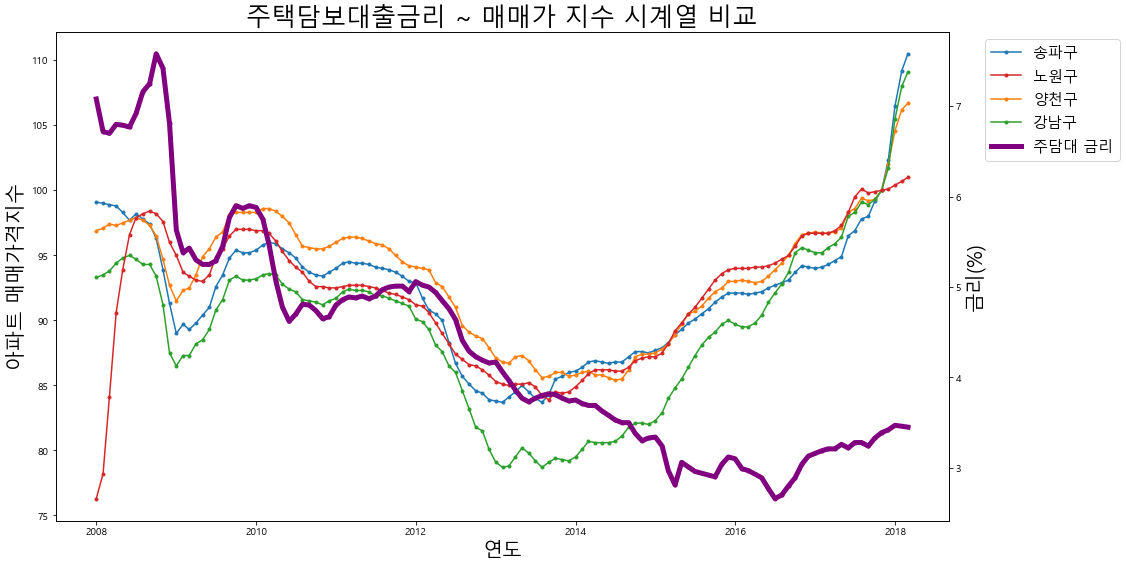

In [30]:
# y축을 2개로 따로 설정하는 코드 ~ y축을 2개 각각 다르게 설정해서 지표 간 비교 추이를 분석 

xs1 = data1.columns # X축: 연도데이터 
xs1 = pd.to_datetime(xs1) # 날짜 형식으로 변경 >> 그래프에 연도별로 표시 가능

fig = plt.figure(figsize=(16,9))
host = fig.subplots() 
par1 = host.twinx() # y축을 2개 만들기 위한 설정

# 그래프 5개 표시 
p1, = host.plot(xs1, list(data1.loc["송파구",:]), marker= '.', label="송파구") # 송파구 매매가 지수
p3, = host.plot(xs1, list(data1.loc["양천구",:]), marker= '.', label="양천구") # 양천구 매매가 지수
p4, = host.plot(xs1, list(data1.loc["강남구",:]), marker= '.', label="강남구") # 강남구 매매가 지수
p2, = host.plot(xs1, list(data1.loc["노원구",:]), marker= '.', label="노원구") # 노원구 매매가 지수
p5, = par1.plot(xs1, list(mortgage_rate.loc["전국",:]), marker= '.',label="주담대 금리",c="purple",lw=5) # 주택담보대출금리 

host.set_xlabel("연도",size=20) # X축 명칭 설정
host.set_ylabel("아파트 매매가격지수",size=20) # 왼쪽 Y축 명칭 설정
par1.set_ylabel("금리(%)",size=20) # 오른쪽 Y축 명칭 설정

lines = [p1,p2,p3,p4,p5] 
host.legend(lines, [l.get_label() for l in lines],bbox_to_anchor=(1.2, 1),fontsize=15) # 그래프 5개에 대한 범례 표시
plt.title("주택담보대출금리 ~ 매매가 지수 시계열 비교",size=25)
plt.show()

# 매매가지수(2017년 11월 기준으로 100)
# 왼쪽 y축은 아파트 매매가격지수 / 오른쪽 y축은 주택담보대출금리

#### 2017년 - 2018년에 송파구, 양천구, 강남구에 비해 노원구의 매매가격 지수가 낮긴 하지만 10년간 전반적인 상승 추이는 비슷하다.

#### 최근 10년동안 지속적으로 주택담보대출금리가 낮아지고 있는 것을 확인 할 수 있다.

#### 주택담보대출금리가 하락함에 따라 매매가격지수 상승하는 것을 확인할 수 있다.

### 즉, 주택담보대출금리가 하락함에 따라 소비자는 부동산 시장 경제에 대해 낙관적으로 인식하고 그에 따라 아파트 매매가격도 지속적인 상승 추이에 있음을 알 수 있다.

## 구별 단위당 아파트 매매가 순위

In [31]:
# 2017년 12월 기준으로 높은 가격 순으로 정렬 >> price_rank
price_rank = price_2017.set_index("구별")

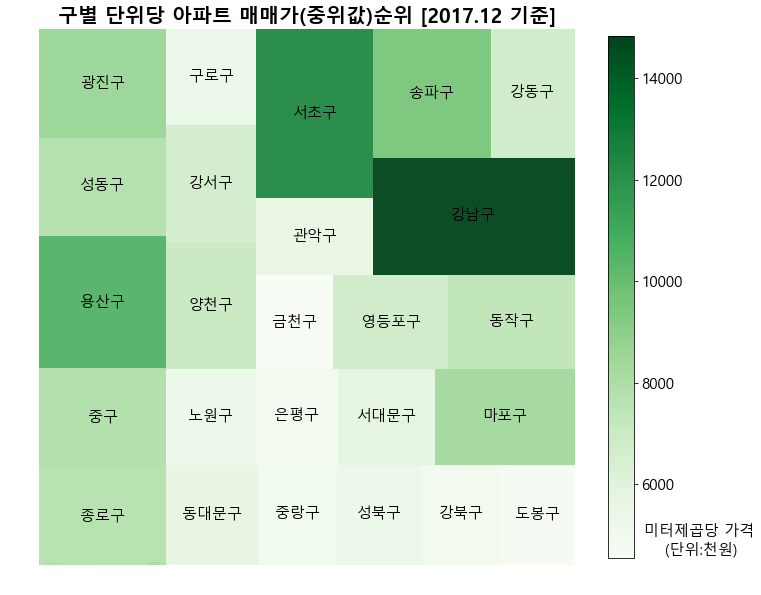

In [32]:
#구별 아파트 가격 순위를  Tree map으로 나타냄
import squarify # pip install squarify 

mpl.rcParams.update({'font.size': 15}) # matplotlib as mpl 의 폰트 크기를 임의로 15로 설정
cmap = mpl.cm.Greens # 초록색으로 색을 설정
norm = mpl.colors.Normalize(vmin=min(price_rank['2017년 12월']), vmax=max(price_rank['2017년 12월']))
colors = [cmap(norm(value)) for value in price_rank['2017년 12월']] # 컬러의 농도를 가격순으로 설정

fig = plt.gcf() #figure 명령을 하지 않고 Figure 객체를 얻기 위해 gcf 명령을 사용
fig.set_size_inches(12,12) # 그래프의 크기 설정
squarify.plot(sizes=price_rank['2017년 12월'], label=price_rank.index,color=colors ,alpha=.95) #투명도 95%로 Treemap 그리기
plt.title("구별 단위당 아파트 매매가(중위값)순위 [2017.12 기준]",fontsize=20,fontweight="bold")

# color bar 설정
img = plt.imshow([price_rank['2017년 12월']], cmap=cmap)
fig.colorbar(img, orientation="vertical", shrink=.80)
plt.text(113,2,"미터제곱당 가격\n    (단위:천원)") # 컬러바의 단위를 표시하기 위해 텍스트 삽입
plt.axis('off') # 그림의 테두리를 표시 하지 않음
plt.show()

- 색이 진하고 크기가 클수록 가격이 높다고 할 수 있다. 특히 가장 높은 구는 강남구, 가장 낮은 구는 금천구
- 2017년 12월 기준으로 미터제곱당 500만원 ~ 1500만원까지 상당한 차이가 나는데 왜 차이가 나는지 변수를 알아보자

## 1. 구별 학원수와 아파트 매매가 상관분석(2016년기준)

In [33]:
# 구별 학원수 데이터 불러오기 > academy
academy = pd.read_excel("서울시 학원 현황_2016.xls",header=1,encoding="utf-8")
academy.head()

,구별,입시검정 및 보습,국제화,예능,특수교육,종합,기타,소계
0,종로구,73.0,6.0,12.0,-,2.0,7.0,100.0
1,중구,47.0,5.0,9.0,-,2.0,2.0,65.0
2,용산구,69.0,27.0,31.0,-,3.0,1.0,131.0
3,성동구,149.0,15.0,61.0,-,11.0,9.0,245.0
4,광진구,244.0,30.0,77.0,-,7.0,17.0,375.0


In [34]:
# 필요없는 행 삭제 
academy.drop([25],inplace=True)
academy.drop([26],inplace=True)

In [35]:
academy=academy.loc[:,["구별","소계"]] #'구별'과 '총 학원수' 데이터만 추려내기 
data_result1 = pd.merge(price_2016,academy,on="구별") # 2016년 기준이므로 2016년 가격 데이터와 학원 수 데이터의 합병
data_result1.rename(columns={data_result1.columns[2]:"학원수"},inplace=True) # 해당 열 이름 변경

In [36]:
data_result1.head()

,구별,2016년 12월,학원수
0,종로구,6165,100.0
1,중구,6163,65.0
2,용산구,7773,131.0
3,성동구,6178,245.0
4,광진구,7050,375.0


In [37]:
# 회귀선 도출 
fp1 = np.polyfit(data_result1["학원수"],data_result1["2016년 12월"],1)
f1 = np.poly1d(fp1)
f1 

poly1d([   4.29753178, 4123.29161879])

In [38]:
# 학원수와 아파트 가격간의 상관계수: 0.72
np.corrcoef(data_result1["학원수"],data_result1["2016년 12월"]) 

array([[1.        , 0.72074051],
       [0.72074051, 1.        ]])

In [39]:
# 회귀선과 떨어진 정도(오차) 계산
data_result1["오차"] = np.abs(data_result1["2016년 12월"]-f1(data_result1["학원수"])) # 오차 열을 생성 
df_sort1=data_result1.sort_values(by="오차",ascending=False) # 오차가 큰 순서대로 정렬한 것을 df_sort1로 지정 
df_sort1.set_index(keys="구별",inplace=True) # 구별로 인덱스 설정
df_sort1.head()

,2016년 12월,학원수,오차
구별,,,
용산구,7773,131.0,3086.731718
노원구,4665,749.0,2677.142920
서초구,10257,825.0,2588.244665
중구,6163,65.0,1760.368816
강남구,12647,1589.0,1694.930387


In [40]:
# seaborn 패키지 사용에 있어서 한글 폰트 문제를 해결하기 위한 코드
sns.set_style("whitegrid") # 그래프 배경 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 깨짐 방지

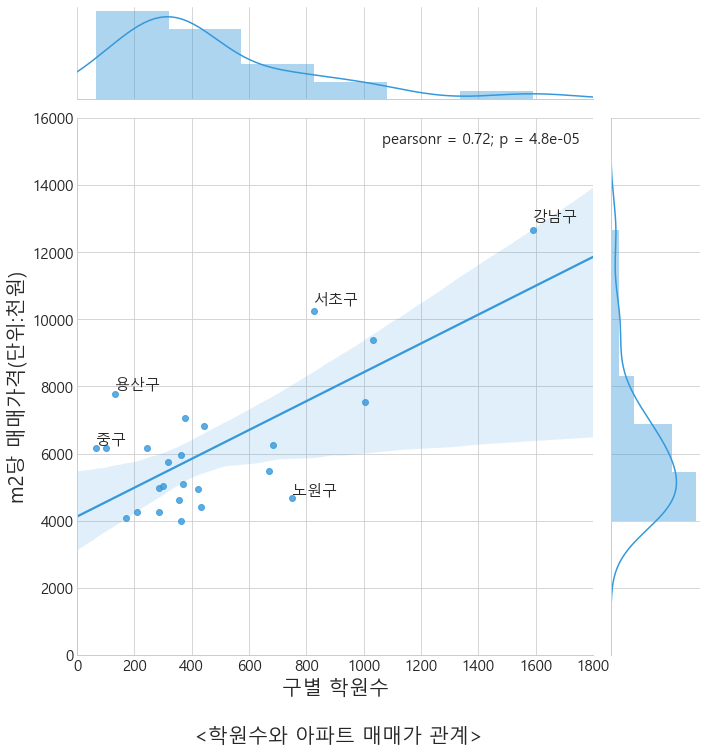

In [41]:
# 시각화
sns.jointplot(x="학원수",y="2016년 12월",data=data_result1,size=10,kind="reg",
              xlim=(0, 1800),ylim=(0, 16000),color='#3498db') 

for n in range(5): # 오차가 가장 큰 순서대로 5개를 텍스트로 표시
   plt.text(df_sort1['학원수'][n]*1.0, df_sort1['2016년 12월'][n]*1.02, 
            df_sort1.index[n], fontsize=15)

plt.ylabel('m2당 매매가격(단위:천원)',size=20)
plt.xlabel('구별 학원수\n\n <학원수와 아파트 매매가 관계>',size=20)
plt.show()

- 학원수와 아파트매매가는 양의 상관관계(0.72)가 있다고 할 수 있다.
- 학원수가 많은 구일수록 아파트 가격이 높은 편이다.
- 특이점은 노원구는 상대적으로 아파트 가격에 비해 학원수가 많은 편이다.

## 2. 구별 한강인접여부와 아파트 매매가 비교 분석

In [42]:
# 한강 인접 여부 데이터 가져오기 > hangang
hangang = pd.read_excel("한강인접여부.xlsx",encoding="euc-kr")

In [43]:
data_result3 = pd.merge(hangang,price_2017,on="구별") # 2017년 가격과 한강데이터를 합병
data_result3.head()

,구별,한강인접여부,2017년 12월
0,종로구,0,7756
1,중구,0,7964
2,용산구,1,10552
3,성동구,1,7847
4,광진구,1,8671


In [44]:
# 2017년 12월 기준으로 비싼 순으로 정렬 
data_result3 = data_result3.sort_values(by="2017년 12월",ascending=False)

In [45]:
df_sort3 = data_result3.set_index("구별") # 구별로 인덱스를 설정한 것을 df_sort3 변수에 지정

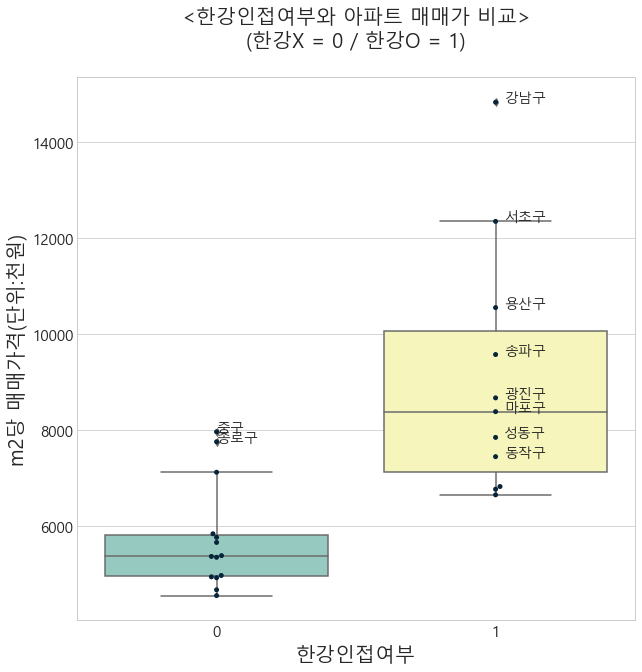

In [46]:
# 박스플롯 시각화 
plt.figure(figsize=(10,10))
sns.swarmplot(x="한강인접여부", y="2017년 12월",data = data_result3,color="#06243a") ## 점으로 데이터 표시
sns.boxplot(x="한강인접여부", y="2017년 12월",data = data_result3,palette="Set3") ## 박스상자로 표시

plt.xlabel("한강인접여부",size=20)
plt.ylabel("m2당 매매가격(단위:천원)",size=20)
plt.title("<한강인접여부와 아파트 매매가 비교>\n(한강X = 0 / 한강O = 1)\n",size=20) 

for n in range(10): # 한강인접여부와 상관없이 가격 상위 10개 구 표시
    plt.text(df_sort3['한강인접여부'][n]*1.03, df_sort3['2017년 12월'][n]*1, 
             df_sort3.index[n], fontsize=14)

plt.show()

- 전체적으로 한강 인근 구가 아파트 가격이 높은 편이다. 
- 한강이 인접하지 않는 자치구 중에서 '중구', '종로구'가 높은 편이다. 

## 3. 구별 아파트 건설 현황과 아파트 매매가 상관분석(2016년 기준)

In [47]:
# 2016년 아파트 가격 불러오기 
price_2016.head()

,구별,2016년 12월
1,종로구,6165
2,중구,6163
3,용산구,7773
4,성동구,6178
5,광진구,7050


In [48]:
# 주택건설현황 데이터 불러오기 > build
build = pd.read_excel("주택건설현황.xls",header=1,encoding="euc-kr")
build.drop([0],inplace=True)
# 총계 80,065 주택건설 중에 종로구, 마포구가 0채로 제일 낮은 것으로 나타났고 강남구가 7643채로 제일 높은 것으로 나타났다

In [49]:
build = build.loc[:,["구별","아파트"]] # '구별','아파트' 열 데이터만 추려내기

In [50]:
data_result4 = pd.merge(price_2016,build,on="구별") # build 와 price_2016 데이터 합병 
data_result4.head()

,구별,2016년 12월,아파트
0,종로구,6165,0
1,중구,6163,368
2,용산구,7773,522
3,성동구,6178,1061
4,광진구,7050,289


In [51]:
# 회귀선 도출
fp4 = np.polyfit(data_result4["아파트"],data_result4["2016년 12월"],1)
f4 = np.poly1d(fp4)
f4

poly1d([1.03923276e+00, 5.10069257e+03])

In [52]:
# 아파트 건설 현황과 아파트 가격간의 상관계수: 0.74
np.corrcoef(data_result4["아파트"],data_result4["2016년 12월"]) 

array([[1.        , 0.74925536],
       [0.74925536, 1.        ]])

상관계수 0.74로 아파트 건설 현황과 가격은 양의 관계가 있다고 할 수 있다.

In [53]:
# 회귀선과 떨어진 정도(오차) 계산
data_result4["오차"] = np.abs(data_result4["2016년 12월"]-f4(data_result4["아파트"]))
df_sort4=data_result4.sort_values(by="오차",ascending=False) # 회귀선과 오차가 많이 떨어진 순서로 정렬
df_sort4.set_index(keys='구별',inplace=True) # 구별로 인덱스 설정한 것을 df_sort4로 지정
df_sort4.head()

,2016년 12월,아파트,오차
구별,,,
서초구,10257,2361,2702.678876
송파구,9386,1720,2497.827076
용산구,7773,522,2129.827924
은평구,4407,1029,1763.063086
마포구,6817,0,1716.307426


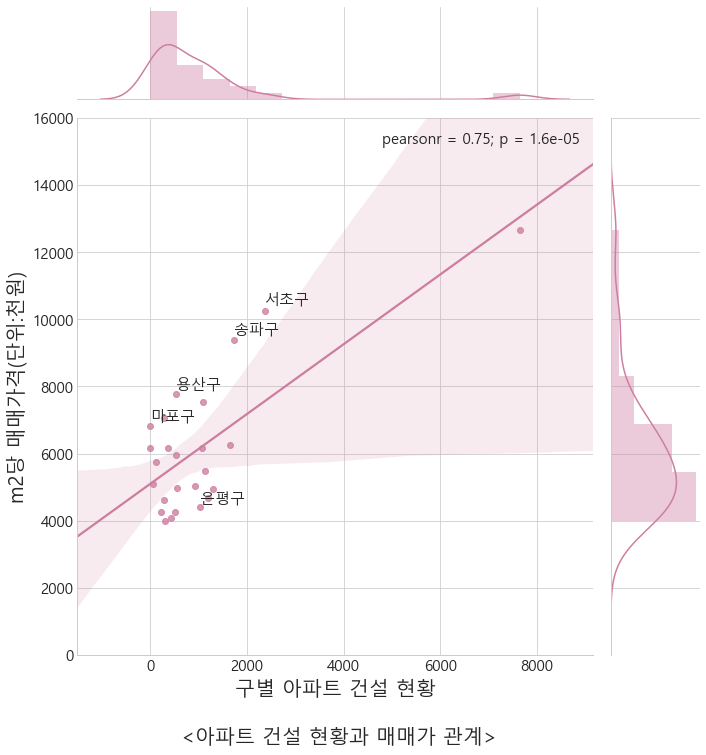

In [54]:
# 시각화
sns.jointplot(x="아파트",y="2016년 12월",data=data_result4,size=10,
              kind="reg",ylim=(0, 16000),color='#cd7ea0') 

plt.ylabel('m2당 매매가격(단위:천원)',size=20)
plt.xlabel('구별 아파트 건설 현황\n\n <아파트 건설 현황과 매매가 관계>',size=20)

for n in range(5): # 오차가 가장 큰 순서대로 5개구를 표시
   plt.text(df_sort4['아파트'][n]*1.0, df_sort4['2016년 12월'][n]*1.02, 
            df_sort4.index[n], fontsize=15)
plt.show()

### 아파트 건설현황과 아파트 가격 상관분석
아파트가 많이 들어선 지역은 아파트 가격이 높은 모습을 볼 수 있었다. 아파트가 많이 들어설수록 그 인근에 백화점과 각종 편의시설 등 인프라시설이 구축되면서 그것이 또 다시 아파트 건설을 유도하게 된다. 법원 근처로 각종 법무법인과 법률사무소, 세무서 근처로 각종 세무법인과 세무사 사무실이 들어서는 것과 같은 이치로 주거지역이 형성될수록(아파트가 많이 건설될수록) 아파트 가격상승이 촉진되는 것이다. 

## 4. 구별 재정자립도와 아파트 매매가 상관분석(2017년 기준)

### 재정자립도
재정자립도란 전체 재원에 대한 자주재원의 비율을 말한다. 자주재원으로는 지방세와 세외수입이 있다. 우리나라는 일부 대도시를 제외하고 대부분의 기초자치단체가 재정자립도가 낮은 모습을 보인다. 지방자치단체의 자율적 재정운영 능력, 즉 자립수준을 나타내는 데 흔히 활용되고 있다. 따라서 재정자립도가 낮으면 지방교부세율의 인상, 지방세원의 확대, 국고보조금 차등보조율제 등 재정 자립의 확충을 위한 정책이 수립할 필요성이 있다. 재정재립도가 높을수록 해당 지방자치단체를 위한 정책이 시행 될 여지가 많다.

In [55]:
# 아파트 2017년 가격 
price_2017.head()

,구별,2017년 12월
1,종로구,7756
2,중구,7964
3,용산구,10552
4,성동구,7847
5,광진구,8671


In [56]:
# 재정자립도 money 변수지정
money = pd.read_csv("Seoul money.csv", encoding="euc-kr",)
money.rename(columns={money.columns[0]: '구별'}, inplace=True)

In [57]:
# 재정자립도 money 변수지정 구별과 2017년 자료만 사용 
money= money.loc[:,['구별','2017_재정자립도']]
money.sort_values(by="2017_재정자립도", ascending=False).head()

,구별,2017_재정자립도
0,서울평균,80.5
2,중구,58.4
23,강남구,58.2
22,서초구,52.5
1,종로구,50.8


In [58]:
# 2017년 12월 아파트가격과 2017 재정자립도 변수 합치기
data_result6 = pd.merge(price_2017, money, on='구별') 
data_result6 = data_result6.loc[:,['구별','2017년 12월','2017_재정자립도']]

In [59]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
# poly1d함수로 그 계수를 사용하여 실제 다항식을 만든다.
fp6 = np.polyfit(data_result6['2017_재정자립도'], data_result6['2017년 12월'], 1)
f6 = np.poly1d(fp6) 
f6

poly1d([ 159.8033123 , 2134.08286774])

In [60]:
# 회귀선과 떨어진 정도(오차) 계산
data_result6['오차'] = np.abs(data_result6['2017년 12월'] - f6(data_result6['2017_재정자립도']))
df_sort6 = data_result6.sort_values(by='오차', ascending=False)
df_sort6 = df_sort6.set_index("구별")
df_sort6.head()

,2017년 12월,2017_재정자립도,오차
구별,,,
중구,7964,58.4,3502.596306
강남구,14831,58.2,3396.364357
종로구,7756,50.8,2496.091132
영등포구,6768,42.0,2077.821984
광진구,8671,28.1,2046.444057


In [61]:
# 재정자립도와 2017년 아파트 매매가 상관계수: 0.803
np.corrcoef(data_result6["2017_재정자립도"],data_result6["2017년 12월"]) 

array([[1.        , 0.80304283],
       [0.80304283, 1.        ]])

아파트 가격과 재정자립도 상관관계는 0.803으로 높은 양의 상관관계가 나왔다.

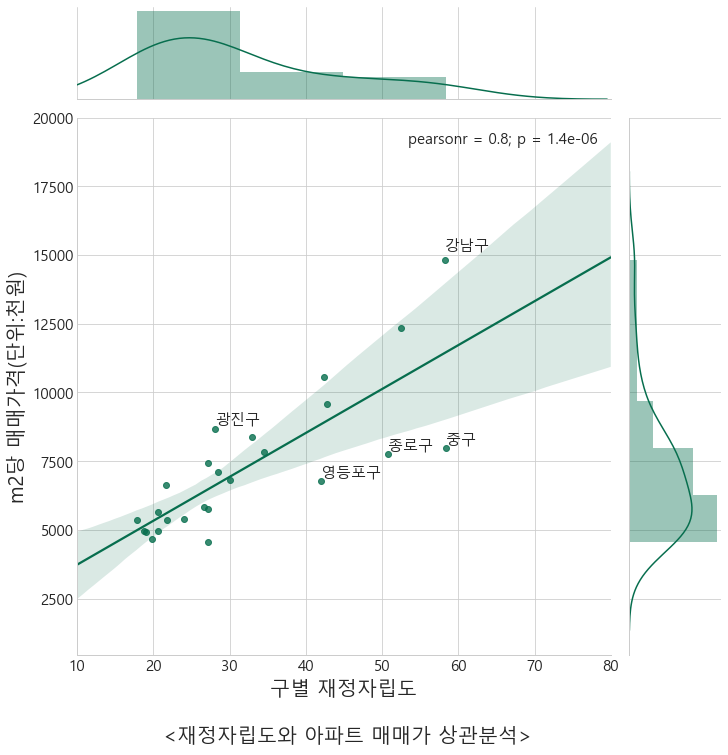

In [62]:
# 시각화
sns.jointplot(x="2017_재정자립도",y="2017년 12월",data=data_result6,size=10,
              kind="reg",xlim=(10,80),color='#076e4e')

plt.ylabel('m2당 매매가격(단위:천원)',size=20)
plt.xlabel('구별 재정자립도\n\n <재정자립도와 아파트 매매가 상관분석>',size=20)

for n in range(5): # 오차가 가장 큰 순서대로 5개구 표시
   plt.text(df_sort6['2017_재정자립도'][n]*1.0, df_sort6['2017년 12월'][n]*1.02, 
            df_sort6.index[n], fontsize=15)
plt.show()

### 재정자립도 상관분석 결과
아파트 가격이 높으면 취득세 및 재산세등 지방세 세원이 많아지므로 지방세로 걷어들일 수 있는 조세수입(자주재원)이 많아지게 된다.
아파트가격이 높은 구들은 자주재원이 많아지므로 재정자립도가 높아지게 된다. 재정자립도가 높아진 구들은 자기 구민들을 위한
구별계획을 시행하기 쉬울 것이다. 재정자립도와 아파트 가격의 상관관계는 0.803로 양의 상관관계를 나타내므로 아파트가격이 높을수록
구들의 재정자립도가 높은 모습을 볼 수 있다.
아파트가격과 지방재원의 상관성이 높기 때문에 실제로 정부는 이를 인지하고 서울시의 경우 특별시분 재산세 일정부분을 공동과세 함으로써 서울시 자치구간 재정불균형을 해소하고 공평과세를 구현하려는 움직임을 보이고 있다.

## 5. 구별 이혼율과 아파트 매매가 상관분석(2017년 기준)

In [63]:
price_2017.head() # 2017년 아파트 가격 데이터 불러오기

,구별,2017년 12월
1,종로구,7756
2,중구,7964
3,용산구,10552
4,성동구,7847
5,광진구,8671


In [64]:
# divorce 이혼률 변수 설정
divorce = pd.read_csv("divorce.csv", encoding="euc-kr")

In [65]:
# 2017결혼과 이혼만 설정
divorce =divorce.loc[:,['구별','2017결혼','2017이혼']]
divorce.sort_values(by="2017이혼", ascending=False).head()

,구별,2017결혼,2017이혼
16,강서구,4069,1120
24,송파구,3896,1041
11,노원구,2420,1003
7,중랑구,2302,956
12,은평구,2331,917


In [66]:
# 2017 아파트 가격과 2017 결혼, 이혼 변수 합치기
data_result7 = pd.merge(price_2017, divorce, on='구별')
data_result7 = data_result7.loc[:,['구별','2017년 12월','2017결혼','2017이혼']]
data_result7.head()

,구별,2017년 12월,2017결혼,2017이혼
0,종로구,7756,700,265
1,중구,7964,792,253
2,용산구,10552,1357,389
3,성동구,7847,2096,509
4,광진구,8671,2082,612


In [67]:
# 2017 12월 아파트 가격과 2017 이혼 상관계수: - 0.18
np.corrcoef(data_result7['2017년 12월'],data_result7['2017이혼'])

array([[ 1.        , -0.18756109],
       [-0.18756109,  1.        ]])

In [68]:
# 2017 12월 아파트 가격과 2017 결혼 상관계수: 0.13
np.corrcoef(data_result7['2017년 12월'],data_result7['2017결혼'])

array([[1.        , 0.13837988],
       [0.13837988, 1.        ]])

 - 만족스러운 결과를 얻지 못했다. 서울은 구별 인구차이가 꽤 많이나기때문에 1,000 명당 이혼자, 결혼자로 계산을 바꿔야
    구별 아파트 가격차이별 이혼자, 결혼자 데이터값을 구할 수 있을 것으로 보인다.

In [69]:
pop = pd.read_csv("population.csv", encoding="euc-kr",) # 인구 데이터 불러오기
pop.head() #2017년 12월을 기준으로 인구 설정

,구별,2017년 12월인구
0,종로구,73594
1,중구,60412
2,용산구,107666
3,성동구,132902
4,광진구,160798


In [70]:
# 인구와 이혼데이터 합치기
data_result7_1 = pd.merge(pop,divorce,on='구별')
data_result7_1 = pd.merge(price_2017,data_result7_1,on="구별")
data_result7_1.head()

,구별,2017년 12월,2017년 12월인구,2017결혼,2017이혼
0,종로구,7756,73594,700,265
1,중구,7964,60412,792,253
2,용산구,10552,107666,1357,389
3,성동구,7847,132902,2096,509
4,광진구,8671,160798,2082,612


In [71]:
#data_result7_1 2017 1000명당 이혼 설정
data_result7_1['2017 1000명당 이혼']= data_result7_1['2017이혼'] / data_result7_1['2017년 12월인구']*1000
data_result7_1['2017 1000명당 결혼']= data_result7_1['2017결혼'] / data_result7_1['2017년 12월인구']*1000

In [72]:
data_result7_1.head()

,구별,2017년 12월,2017년 12월인구,2017결혼,2017이혼,2017 1000명당 이혼,2017 1000명당 결혼
0,종로구,7756,73594,700,265,3.600837,9.511645
1,중구,7964,60412,792,253,4.187910,13.109978
2,용산구,10552,107666,1357,389,3.613025,12.603793
3,성동구,7847,132902,2096,509,3.829890,15.771019
4,광진구,8671,160798,2082,612,3.806017,12.947922


In [73]:
# 2017년 12월 아파트 가격과 2017년 1000명당 이혼 상관계수 -0.61
np.corrcoef(data_result7_1['2017년 12월'],data_result7_1['2017 1000명당 이혼'])

array([[ 1.        , -0.61064799],
       [-0.61064799,  1.        ]])

1000명당 이혼은 아파트 가격과 -0.61 의 상관관계를 보였다. 아파트 가격이 올라갈수록 금전적으로 여유가 생기므로 가정의 불화가 나타날 확률이 적어질수도 있을 것이며, 이혼 할 경우 소유권 분배 문제에 있어서 다툼이 심해질 여지가 있으므로 아파트 가격이 올라갈수록 이혼율이 떨어지는 현상이 일어날 것으로 추측해 볼 수 있을 것이다.

In [74]:
# 2017년 12월 아파트 가격과 2017년 1000명당 결혼 상관계수 0.1568
np.corrcoef(data_result7_1['2017년 12월'],data_result7_1['2017 1000명당 결혼'])

array([[1.        , 0.15684848],
       [0.15684848, 1.        ]])

1000명당 결혼은 양의 상관관계를 나타내지만 크나큰 연관성을 찾기 힘들었다.

In [75]:
# 회귀선 도출
fp7_1 = np.polyfit(data_result7_1['2017 1000명당 이혼'],data_result7_1['2017년 12월'],1)
f7_1 = np.poly1d(fp7_1) # y축
f7_1

poly1d([-2527.90238375, 17480.51146947])

In [76]:
# 회귀선과 떨어진 정도(이혼율) 계산하고 df_sort7에 지정함
data_result7_1['오차'] = np.abs(data_result7_1['2017년 12월'] - f7_1(data_result7_1['2017 1000명당 이혼']))
df_sort7 = data_result7_1.sort_values(by='오차', ascending=False)
df_sort7 = df_sort7.set_index("구별")

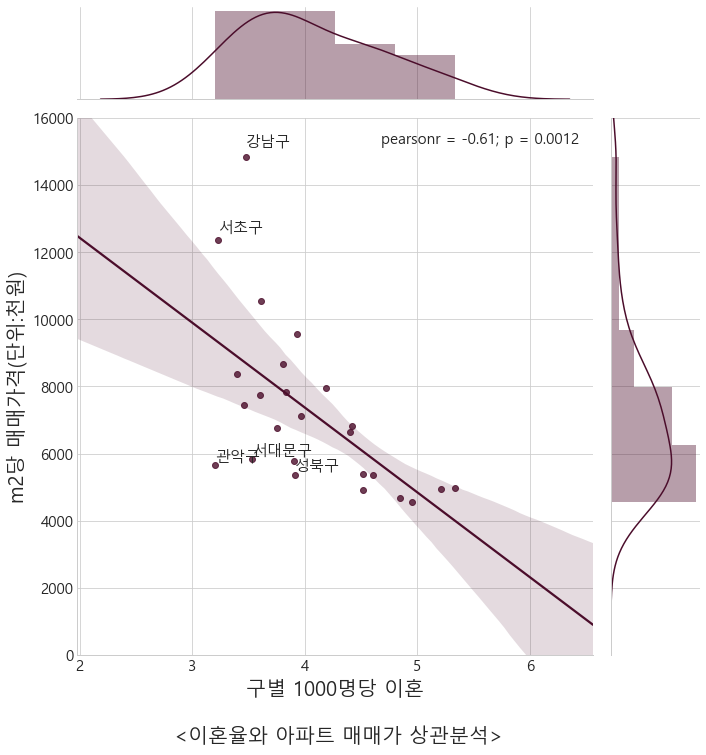

In [77]:
# 시각화
sns.jointplot(x="2017 1000명당 이혼",y="2017년 12월",data=data_result7_1,size=10,
              ylim=(0,16000),kind="reg",color='#4b0d2b')

plt.ylabel('m2당 매매가격(단위:천원)',size=20)
plt.xlabel('구별 1000명당 이혼\n\n <이혼율와 아파트 매매가 상관분석>',size=20)

for n in range(5): # 오차가 가장 큰 순서대로 5개구 표시
   plt.text(df_sort7['2017 1000명당 이혼'][n]*1.0, df_sort7['2017년 12월'][n]*1.02, 
            df_sort7.index[n], fontsize=15)
plt.show()

### 아파트가격과 이혼의 상관분석
아파트 가격이 높아질수록 이혼률이 낮아지는 음의 상관관계가 나타났다. 이혼을 하는 데는 많은 이유가 있겠지만 공인들은 '성격차이'로 이혼했다는 말을 많이 하는 것을 들어본 적이 있을 것이다. 하지만 현실에서는 재정적인 문제로 주식이나 도박으로 가진 재산을 다 잃고 이혼하는 모습을 주위에서 흔히 볼 수 있다. 아파트가격이 높아질수록 재산의 증가(부의 증가)를 가져오고 전보다 더욱 더 안정된 생활을 영위할 수 있게 된 것을 의미하고 재정적으로 이혼을 할 이유가 없어지게 된다. 또한 이혼을 할 경우 재산분배를 위해 아파트를 양도 해야되고 이는 또 국가에 막대한 세금을 내야되는 것을 의미한다.
그 결과, 재정적인 문제가 부부간의 결속을 더욱 더 굳건히 만드는 것으로 해석해 볼 수도 있을 것이다.

## 6. 구별 결혼율과 아파트 매매가 상관분석

In [78]:
# 회귀식 도출
fp7_2 = np.polyfit(data_result7_1['2017 1000명당 결혼'],data_result7_1['2017년 12월'],1)
f7_2 = np.poly1d(fp7_2) # y축
f7_2

poly1d([ 222.16576484, 4402.25813651])

In [79]:
#오차2(결혼율) 계산
data_result7_1['오차2'] = np.abs(data_result7_1['2017년 12월'] - f7_2(data_result7_1['2017 1000명당 결혼']))
df_sort7 = data_result7_1.sort_values(by='오차2', ascending=False)
df_sort7 = df_sort7.set_index("구별")
df_sort7.head()

,2017년 12월,2017년 12월인구,2017결혼,2017이혼,2017 1000명당 이혼,2017 1000명당 결혼,오차,오차2
구별,,,,,,,,
강남구,14831,231612,2677,805,3.475640,11.558123,6136.567917,7860.922612
서초구,12348,173594,2288,561,3.231679,13.180179,3036.856350,5017.557307
용산구,10552,107666,1357,389,3.613025,12.603793,2204.864223,3349.610505
금천구,4551,106066,1439,525,4.949748,13.567024,417.031019,2865.386468
중랑구,4970,179132,2302,956,5.336847,12.850859,980.515700,2287.278963


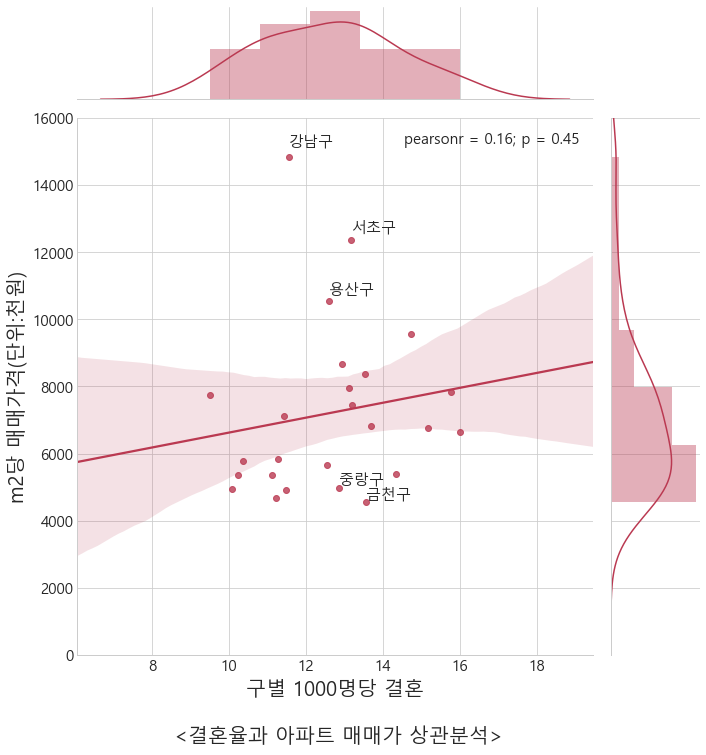

In [80]:
# 시각화
sns.jointplot(x="2017 1000명당 결혼",y="2017년 12월",data=data_result7_1,size=10,
              ylim=(0,16000),kind="reg",color='#ba3951')

plt.ylabel('m2당 매매가격(단위:천원)',size=20)
plt.xlabel('구별 1000명당 결혼\n\n <결혼율과 아파트 매매가 상관분석>',size=20)

for n in range(5): # 오차가 가장 큰 순서대로 5개 구
   plt.text(df_sort7['2017 1000명당 결혼'][n]*1.0, df_sort7['2017년 12월'][n]*1.02, 
            df_sort7.index[n], fontsize=15)
plt.show()

### 아파트가격과 결혼의 상관관계
결혼과 아파트가격과의 상관성은 거의 없는 것으로 보인다. 돈이 적고 많음을 떠나 두 사람의 사랑이 있어야 결혼으로 이어진다는 로맨스를 적용해 볼 수 있지 않을까. 안타깝게도 사랑은 정성적인 자료로 측정하기 힘들기때문에 이번 분석에서 결혼은 상관성분석에서 제외하기로 한다.

# 다중회귀분석(OLS)

In [81]:
## 다중회귀분석를 하기위한 데이터 합병 과정
final_result = pd.concat([df_sort1,df_sort3,df_sort4,df_sort6,df_sort7],axis=1)

In [82]:
# 합병한 데이터 중에서 필요한 열 데이터만 가져오기
final_result = final_result.loc[:,["학원수",'한강인접여부','아파트','2017_재정자립도','2017 1000명당 이혼','2017 1000명당 결혼']]

In [83]:
## 데이터프레임에 매매가 데이터 추가하기
final_result = pd.concat([final_result,df_sort6["2017년 12월"]],axis=1)

In [84]:
OLS_model =final_result.convert_objects(convert_numeric=True) #다중회귀분석을 위해 데이터타입을 수치형으로 변환

In [85]:
OLS_model.head()

,학원수,한강인접여부,아파트,2017_재정자립도,2017 1000명당 이혼,2017 1000명당 결혼,2017년 12월
강남구,1589.0,1,7643,58.2,3.475640,11.558123,14831
강동구,683.0,1,1649,30.1,4.419217,13.680407,6824
강북구,209.0,0,221,18.8,5.205812,10.074860,4942
강서구,670.0,1,1124,21.6,4.404992,16.003493,6650
관악구,369.0,0,45,20.6,3.199505,12.551302,5659


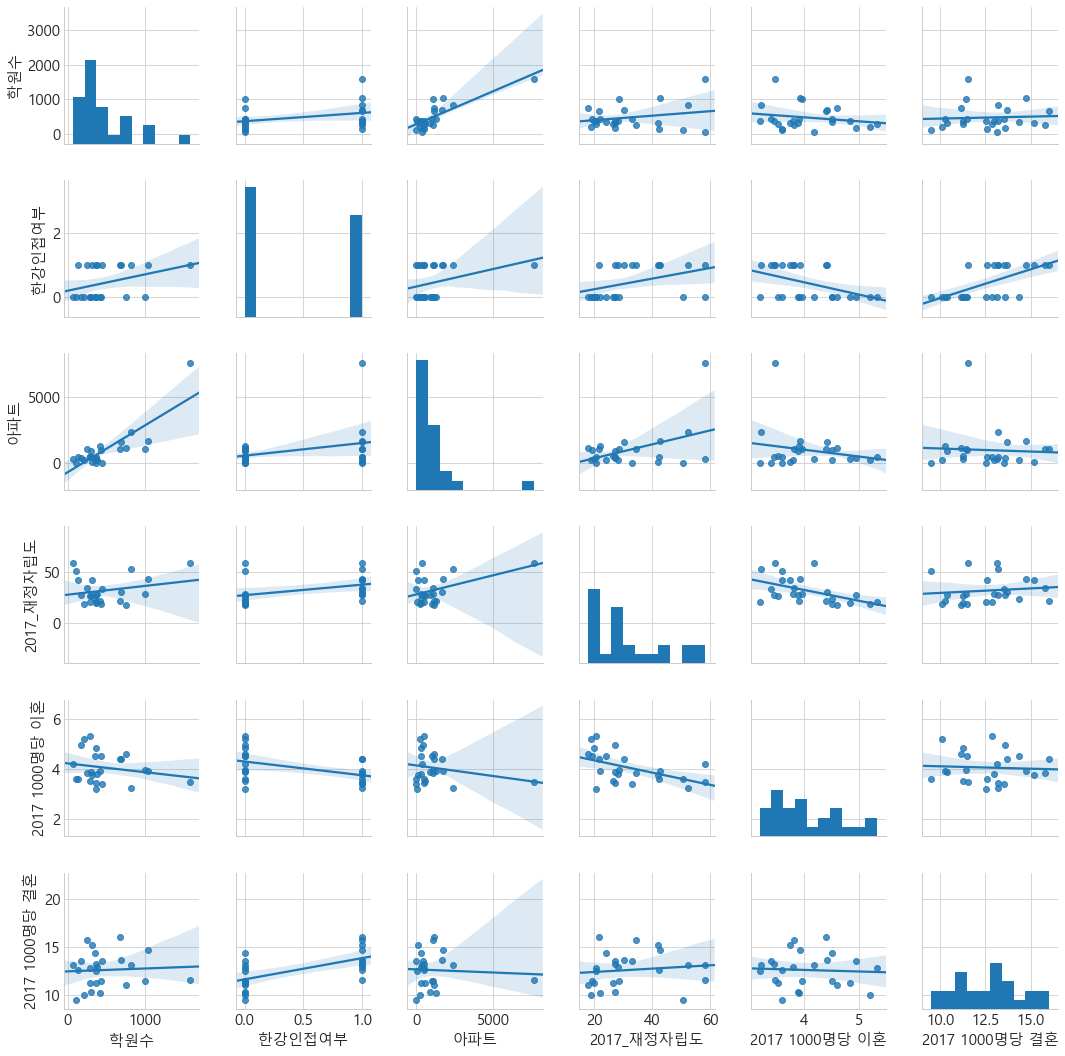

In [86]:
## 추가적으로 각 독립변수들간의 상관관계 그래프로 표현
sns.pairplot(OLS_model,x_vars=["학원수",'한강인접여부','아파트','2017_재정자립도','2017 1000명당 이혼','2017 1000명당 결혼'],
             y_vars=["학원수",'한강인접여부','아파트','2017_재정자립도','2017 1000명당 이혼','2017 1000명당 결혼'],kind="reg")
plt.show()

### 추가적으로 각 독립변수들간의 상관분석을 실시해보았다.
- 양의 상관관계는 아파트(x) ~ 학원수(y), 아파트(x) ~ 재정자립도(y) / 음의 상관관계는 재정자립도(x) ~ 이혼율(y)만 명확하게 나왔다. 


In [87]:
# 다중회귀분석을 위한 statsmodels패키지 불러오기
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import pandas as pd
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [88]:
# 다중회귀분석에 필요한 각각의 독립변수 설정
dfx =pd.DataFrame(OLS_model,columns=["학원수",'한강인접여부',
                                     '아파트','2017_재정자립도','2017 1000명당 이혼',
                                     '2017 1000명당 결혼'])
dfx=sm.add_constant(dfx) # 상수항 처리하기
dfy=pd.DataFrame(OLS_model,columns=["2017년 12월"]) # 종속변수 설정
model = sm.OLS(dfy,dfx).fit() # 다중회귀분석 모델 설정

In [89]:
model.summary() # 다중회귀분석 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              2017년 12월   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     36.56
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           3.96e-09
Time:                        21:35:07   Log-Likelihood:                -198.51
No. Observations:                  25   AIC:                             411.0
Df Residuals:                      18   BIC:                             419.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7560.8890   2010.032      3.762      0.001    3337.969    1.18e+04
학원수                0.8704      0.894      0.973      0.343      -1.009       2.749
한강인접여부          2061.0673    543.793      3.790      0.001     918.600    3203.534
아파트                0.3683      0.229      1.607      0.125      -0.113       0.850
2017_재정자립도        92.3065     17.710      5.212      0.000      55.098     129.515
2017 1000명당 이혼  -511.9334    354.237     -1.445      0.166   -1256.157     232.290
2017 1000명당 결혼  -229.1888    134.804     -1.700      0.106    -512.403      54.025
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.490
Skew:                          -0.265   Prob(JB):                        0.783
Kurtosis:                       3.435   Cond. No.                     2.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 복잡한 다중회귀모형에서 꼭 봐야하는 부분은 Adj. R-squared 와 P>|t| (P-value)이다. 
- Adj. R-squared은 전체 100%중에서 이 모형이 얼마만큼 설명이 가능한지를 말해준다.
- P>|t| (p-value)는 일반적으로 유의수준(오류를 나타내는 정도) 0.05 보다 작아야 적절한 회귀계수를 추정했다고 말할 수 있다.


Adj. R-squared:0.899로 설명력은 좋으나 각 회귀계수들의 P>|t|(p-value)가 높아서 다중회귀모형의 신뢰성이 떨어진다.

#### 그래서 p-value 높은 변수들을 제거하고 ['한강인접여부', '아파트', "2017_재정자립도", '2017 1000명당 이혼']을 선택하여 적합한 모델을 찾아보았다.

In [90]:
# 특정 변수 4개를 활용한 다중회귀분석
dfx1 =pd.DataFrame(OLS_model,columns=['한강인접여부','아파트',"2017_재정자립도",'2017 1000명당 이혼'])
dfx1=sm.add_constant(dfx1)
dfy1=pd.DataFrame(OLS_model,columns=["2017년 12월"])
model1 = sm.OLS(dfy1,dfx1).fit()

In [91]:
model1.summary() # 다중회귀분석 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              2017년 12월   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     50.34
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           3.66e-10
Time:                        21:35:07   Log-Likelihood:                -200.70
No. Observations:                  25   AIC:                             411.4
Df Residuals:                      20   BIC:                             417.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6299.3474   1713.478      3.676      0.001    2725.095    9873.600
한강인접여부          1472.9636    393.332      3.745      0.001     652.487    2293.440
아파트                0.6225      0.128      4.880      0.000       0.356       0.889
2017_재정자립도        84.4691     17.114      4.936      0.000      48.770     120.168
2017 1000명당 이혼  -750.5173    341.641     -2.197      0.040   -1463.169     -37.866
==============================================================================
Omnibus:                        0.614   Durbin-Watson:                   2.962
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.042
Skew:                          -0.038   Prob(JB):                        0.979
Kurtosis:                       3.185   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adj. R-squared:	0.892로 설명력이 뛰어나며 
### p-value가 유의수준(0.05)보다 작기 때문에 모델의 신뢰성이 좋다고 할 수 있다.
### 다중회귀식: Y = (한강인접여부)X0 + (아파트)X1 + (재정자립도)X2 + (1000명당 이혼)X3 에서
- 각 독립변수의 coef(계수)의 절대값이 가장 큰 것이 한강인접여부(1472.96) 이고 가장 작은 것이 아파트 건설 현황(0.6225)이다.  
- 그러므로 이 모형에서 한강인접여부가 가장 영향력이 크고 아파트 건설 현황이 상대적으로 영향력이 작다고 말할 수 있다.

In [92]:
# R_squared 출력
print("Rsquaured: ",model1.rsquared)

Rsquaured:  0.9096553692624891


In [93]:
# 각 회귀계수 출력
print("parameter: ", model1.params)

parameter:  const             6299.347351
한강인접여부            1472.963567
아파트                  0.622476
2017_재정자립도          84.469075
2017 1000명당 이혼    -750.517323
dtype: float64


In [94]:
# 회귀계수에 대한 p_value 출력
print("p-value: ", model1.pvalues)

p-value:  const             0.001497
한강인접여부            0.001277
아파트               0.000091
2017_재정자립도        0.000080
2017 1000명당 이혼    0.039988
dtype: float64


# 4. 한계점 



- 빅데이터를 통해서 대표성을 나타낼 수 있는 유의미한 인사이트를 도출하고 싶었지만 데이터의 수(구별=25개)가 부족하여 아쉬었다. 
- 구 전체를 나타내는 데이터를 사용하여 세부적인 영역(예: 영등포구 여의도 증권가 주변 고급 아파트)에 적용하기 힘들었다.
- 한강에 가까운 아파트일수록 가격이 비싸지는데 같은 자치구라도 한강에서 멀리 떨어진 지역의 아파트도 포함한다.
  그렇기 때문에 한강 인접 여부가 꼭 자치구별 아파트 전체에 영향을 준다는 분석에 한계가 있다.

# 5. 결론 및 시사점 

In [95]:
# 지도의 색 구분을 하기위해 map_price 변수 설정
map_price = price_2017.set_index("구별")

In [96]:
# 가격이 높은 정도에 따라 색이 진해지는 서울시 구별 지도 출력
map = folium.Map(location=[37.5502, 126.982], zoom_start=12)
map.choropleth(geo_data = geo_str,
               data = map_price['2017년 12월'],
               columns = [map_price.index, map_price['2017년 12월']],
               fill_color = 'YlOrBr',
               key_on = 'feature.id')
map

 - 한강과 인접한 구들의 가격의 더 높다 그 중에서도 강남 3구의 가격이 다른 구들에비해서 압도적으로 높은 것을 확인 할 수 있다.
 이 결과가 시사하는 점은? '한강의 기적'은 정말 한강하고도 연관성이 있었다!

# 분석후의 서울지도
모든 분석을 마치고 우리는 2017년 12월 가격을 기준으로 서울지도의 가격을 기준으로 서울지도를 재작성 해보았다.
강남 3구로 일컫어지는 서초구, 강남구, 송파구는 아파트 가격에서도 그렇지만 우리가 분석한 6개의 상관분석에서 대부분
상위 3구를 기록하는 위엄을 보였다. 학원수, 아파트 건설현황에서 그러했다. 재정자립도는 2012년 기준 강남3구가
가장 높았지만 2017년까지 서울시의 지역균형발전화의 영향으로(추측) 점점 낮아지고 있는 모습을 확인할 수 있었다. 한강 인접성 여부에서도
세구는 모두 한강에 붙어있고 전체적으로 한강에 인접한 구들의 아파트가격이 높은 점을 확인 할 수 있었다. (물론 예외도 존재해서 중구, 종로구는 한강에
인접하지 않았지만 아파트 가격이 높은 모습을 볼 수 있었다. 하지만 한강과 바로 연접하지는 않아도 거리상 한강에 가까운편이기때문에 어느정도 연관성이 있는 것으로 해석할 여지가 있다.)
이혼율(음의 상관관계) 또한 강남3구는 낮은 모습을 확인할 수 있었다. 초기의 목적인 아파트 가격과의 실생활에서 접할 수 있는 지표들과의 상관성 분석은
어느정도 달성하였지만 분석을 할수록 연관성이 있는 인과에 대한 해석과 변수의 절대량 부족에 의한 정확성이 한계점으로 보인다.
한정된 변수중에서도 정확성을 더 높이기위해 다중회귀분석을 통해 P.value가 높은 값을 배제해보는 시도를 해보았지만 시간적여유가
있었다면 더 많은 변수와 데이터를 가지고 조사를 하였다면 정확성 높은 파이썬분석이 가능하지 않았을까 하는 아쉬움이 남는다. 

## 6. 요약

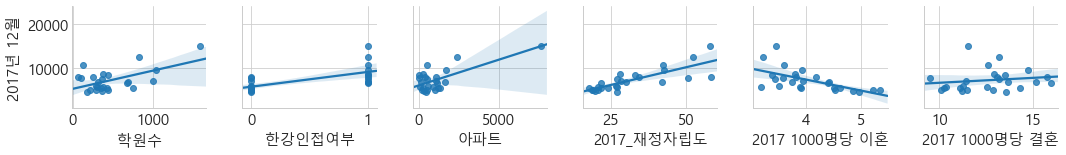

In [97]:
# 6가지 분석 내용 그래프 요약
sns.pairplot(OLS_model,x_vars=["학원수",'한강인접여부','아파트','2017_재정자립도','2017 1000명당 이혼','2017 1000명당 결혼'],
             y_vars=['2017년 12월'],kind="reg")
plt.show()

### ▶6개 독립변수 분석 결과
1. 학원수 ~ 아파트 매매가 > 상관계수: 0.72
2. 한강인접여부 ~ 아파트 매매가 > 한강이 접한 구가 더 비싸다.
3. 아파트 건설 현황 ~ 아파트 매매가 > 상관계수: 0.75
4. 재정자립도 ~ 아파트매매가 > 상관계수: 0.8
5. 1000명당 이혼 ~ 아파트매매가 > 상관계수: -0.61 
6. 1000명당 결혼 ~ 아파트매매가 > 상관계수: 0.16

### ▶다중회귀분석 결과
- 최종 변수 4개('한강인접여부','아파트','재정자립도','1000명당 이혼')을 선택하여 다중회귀모형을 설정
- 다중회귀모형은 Adj. R-squared:0.892로 설명력이 좋고 p-value는 일반적인 유의수준(=0.05)보다 낮아서 각 회귀계수가 신뢰성이 있다고 판단된다.

### ▶결론
- 아파트 거래를 할 때 재정자립도, 한강인접여부를 고려하면 좋을 것 같다.
- 이혼율이 높을수록 가격이 떨어지는 의외의 결과를 도출했다
- 관련성이 없어 보이는 다양한 데이터를 통해서 아파트 가격과의 상관관계를 알 수 있었다